<a href="https://colab.research.google.com/github/rwiddhi-b/Covid-Data-Analysis/blob/main/Major_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


data = pd.read_csv ('/content/drive/MyDrive/DataSet Covid/owid-covid-data.csv')
data.head()


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2020-02-24,1.0,1.0,NaN,NaN,NaN,NaN,0.026,0.026,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
1,AFG,Asia,Afghanistan,2020-02-25,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
2,AFG,Asia,Afghanistan,2020-02-26,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
3,AFG,Asia,Afghanistan,2020-02-27,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511
4,AFG,Asia,Afghanistan,2020-02-28,1.0,0.0,NaN,NaN,NaN,NaN,0.026,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,38928341.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511


In [ ]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'new_vaccinations',
       'new_vaccinations_smoothed', 'total_vaccinations_per_hun

In [ ]:
data.tail()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
80317,ZWE,Africa,Zimbabwe,2021-04-04,36923.0,12.0,14.429,1525.0,1.0,0.714,2484.235,0.807,0.971,102.604,0.067,0.048,0.85,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1115.0,443188.0,29.818,0.075,1640.0,0.110,0.009,113.7,tests performed,138900.0,117297.0,21603.0,5985.0,8537.0,0.93,0.79,0.15,574.0,57.41,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80318,ZWE,Africa,Zimbabwe,2021-04-05,36934.0,11.0,13.571,1525.0,0.0,0.714,2484.975,0.740,0.913,102.604,0.000,0.048,0.86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1171.0,444359.0,29.897,0.079,1597.0,0.107,0.008,117.7,tests performed,145510.0,123454.0,22056.0,6610.0,9129.0,0.98,0.83,0.15,614.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80319,ZWE,Africa,Zimbabwe,2021-04-06,36966.0,32.0,18.143,1531.0,6.0,1.571,2487.128,2.153,1.221,103.008,0.404,0.106,0.87,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1604.0,445963.0,30.005,0.108,1444.0,0.097,0.013,79.6,tests performed,162633.0,139133.0,23500.0,17123.0,10967.0,1.09,0.94,0.16,738.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80320,ZWE,Africa,Zimbabwe,2021-04-07,36984.0,18.0,14.571,1531.0,0.0,1.143,2488.339,1.211,0.980,103.008,0.000,0.077,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3301.0,449264.0,30.227,0.222,1710.0,0.115,0.009,117.4,tests performed,179417.0,153238.0,26179.0,16784.0,12505.0,1.21,1.03,0.18,841.0,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571
80321,ZWE,Africa,Zimbabwe,2021-04-08,37052.0,68.0,22.286,1532.0,1.0,1.286,2492.914,4.575,1.499,103.075,0.067,0.087,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14862927.0,42.729,19.6,2.822,1.882,1899.775,21.4,307.846,1.82,1.6,30.7,36.791,1.7,61.49,0.571


In [ ]:
data.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
count,7.869400e+04,78692.000000,77691.000000,6.921800e+04,69376.000000,77691.000000,78267.000000,78265.000000,77269.000000,68804.000000,68962.000000,77269.000000,64756.000000,8456.000000,8456.000000,10127.000000,10127.000000,743.000000,743.000000,1240.000000,1240.000000,3.693100e+04,3.666100e+04,36661.000000,36931.000000,4.224600e+04,42246.000000,40925.000000,40309.000000,6.820000e+03,6.192000e+03,4.391000e+03,5.777000e+03,1.080200e+04,6820.000000,6192.000000,4391.000000,10802.000000,68455.000000,7.982400e+04,74865.000000,72607.000000,71775.000000,72199.000000,72906.000000,49715.000000,73497.000000,74480.000000,57688.000000,56836.000000,36917.000000,67179.000000,76245.000000,73439.000000
mean,7.429238e+05,5430.286471,5417.396717,2.128240e+04,134.662001,118.743826,8965.988111,71.393497,71.212973,204.718066,1.456059,1.280681,1.021877,1032.227412,24.683618,4765.028241,165.613372,271.228685,20.480506,3935.503165,113.637663,4.090608e+04,5.396336e+06,200.991567,1.701402,3.924693e+04,1.615332,0.088060,161.882140,1.065782e+07,7.042459e+06,3.486818e+06,3.696729e+05,1.975201e+05,10.275947,7.373792,3.980631,2579.171172,58.724224,1.295847e+08,342.863126,30.533267,8.781414,5.563671,19138.207162,13.312278,257.521929,7.809495,10.528849,32.655004,50.952758,3.031607,73.156758,0.727453
std,5.169702e+06,33480.103666,32963.628052,1.253299e+05,734.731397,670.245949,17412.235307,173.981249,147.043462,361.088519,3.938565,2.861836,0.360881,3024.061648,27.082366,12539.248661,206.906237,570.645988,36.851142,11724.177615,232.836546,1.541591e+05,2.470197e+07,419.147547,4.636338,1.415873e+05,3.764540,0.097634,880.488825,4.501895e+07,2.707271e+07,1.243248e+07,1.431444e+06,9.431978e+05,18.801925,12.099113,8.478574,4758.388183,21.832720,6.937368e+08,1672.598865,9.113487,6.229958,4.254000,19785.659424,19.929106,118.677828,3.957991,10.402590,13.474173,31.765209,2.464940,7.551948,0.150071
min,1.000000e+00,-74347.000000,-6223.000000,1.000000e+00,-1918.000000,-232.143000,0.001000,-2153.437000,-276.825000,0.001000,-76.445000,-10.921000,-0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-2.391720e+05,0.000000e+00,0.000000,-23.010000,0.000000e+00,0.000000,0.000000,1.300000,0.000000e+00,0.000000e+00,1.000000e+00,-2.928600e+04,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,8.090000e+02,0.137000,15.100000,1.144000,0.526000,661.240000,0.100000,79.370000,0.990000,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000
25%,8.430000e+02,2.000000,6.429000,4.200000e+01,0.000000,0.000000,178.762500,0.168000,1.086000,6.238000,0.000000,0.000000,0.860000,24.000000,3.675000,99.000000,20.794000,7.896500,1.678000,53.242250,9.064750,1.379500e+03,1.134750e+05,10.283000,0.119000,1.408000e+03,0.117000,0.016000,7.800000,5.347925e+04,4.971825e+04,2.500400e+04,3.388000e+03,1.037000e+03,0.730000,0.630000,0.330000,300.250000,44.440000,2.540916e+06,36.25

In [ ]:
data.isnull().sum()

iso_code                                     0
continent                                 3913
location                                     0
date                                         0
total_cases                               1628
new_cases                                 1630
new_cases_smoothed                        2631
total_deaths                             11104
new_deaths                               10946
new_deaths_smoothed                       2631
total_cases_per_million                   2055
new_cases_per_million                     2057
new_cases_smoothed_per_million            3053
total_deaths_per_million                 11518
new_deaths_per_million                   11360
new_deaths_smoothed_per_million           3053
reproduction_rate                        15566
icu_patients                             71866
icu_patients_per_million                 71866
hosp_patients                            70195
hosp_patients_per_million                70195
weekly_icu_ad

In [ ]:
#Taking Few columns to anwer question
df = data [['location','continent','date','total_cases','new_cases','total_deaths','new_deaths']]
df.head()


,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,Asia,2020-02-25,1.0,0.0,NaN,NaN
2,Afghanistan,Asia,2020-02-26,1.0,0.0,NaN,NaN
3,Afghanistan,Asia,2020-02-27,1.0,0.0,NaN,NaN
4,Afghanistan,Asia,2020-02-28,1.0,0.0,NaN,NaN


In [ ]:
df = df.mask(df.eq(0)).dropna(how='all', axis=1)
df = df[df['continent'].notna()]
df.isnull().sum()
df.head()

,location,continent,date,total_cases,new_cases,total_deaths,new_deaths
0,Afghanistan,Asia,2020-02-24,1.0,1.0,NaN,NaN
1,Afghanistan,Asia,2020-02-25,1.0,NaN,NaN,NaN
2,Afghanistan,Asia,2020-02-26,1.0,NaN,NaN,NaN
3,Afghanistan,Asia,2020-02-27,1.0,NaN,NaN,NaN
4,Afghanistan,Asia,2020-02-28,1.0,NaN,NaN,NaN


In [ ]:
#Since i need new cases i make a new dataframe with date and new cases

df1 = df[df['new_cases'].notna()]
df2 = df1[['date','new_cases']]
df2.head()

,date,new_cases
0,2020-02-24,1.0
8,2020-03-03,1.0
9,2020-03-04,2.0
13,2020-03-08,1.0
14,2020-03-09,2.0


In [ ]:
finaldf = df2

In [ ]:
finaldf = finaldf.rename(columns={'date':'ds','new_cases':'y'})
finaldf

,ds,y
0,2020-02-24,1.0
8,2020-03-03,1.0
9,2020-03-04,2.0
13,2020-03-08,1.0
14,2020-03-09,2.0
...,...,...
80317,2021-04-04,12.0
80318,2021-04-05,11.0
80319,2021-04-06,32.0
80320,2021-04-07,18.0


In [ ]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58451 entries, 0 to 80321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ds      58451 non-null  object 
 1   y       58451 non-null  float64
dtypes: float64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
#Converting columns into required formats
#ds to timestamp
#y to int


In [ ]:
finaldf['ds'] = pd.to_datetime(finaldf['ds'])
finaldf['y'] = finaldf['y'].astype(int)
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58451 entries, 0 to 80321
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      58451 non-null  datetime64[ns]
 1   y       58451 non-null  int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.3 MB


In [ ]:
#Plot for date vs increase in cases


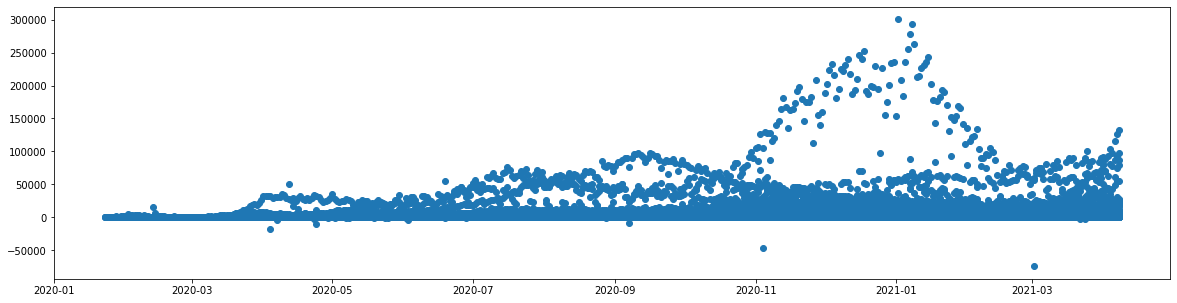

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,5))
plt.scatter(finaldf['ds'],finaldf['y'])
plt.show()

In [ ]:
from fbprophet import Prophet

In [ ]:
prediction = Prophet()
prediction.fit(finaldf)
forecast = prediction.make_future_dataframe(periods=30,freq='D')
forecast = prediction.predict(forecast)

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [ ]:
forecast[['ds','yhat','yhat_lower','yhat_upper']].head()

,ds,yhat,yhat_lower,yhat_upper
0,2020-01-23,222.819651,-12744.950244,13983.540685
1,2020-01-24,181.514666,-12260.385856,12691.716427
2,2020-01-25,91.998401,-13349.529699,13972.130956
3,2020-01-26,-250.236745,-13810.525488,12993.894901
4,2020-01-27,-339.602055,-12863.564307,13052.433760


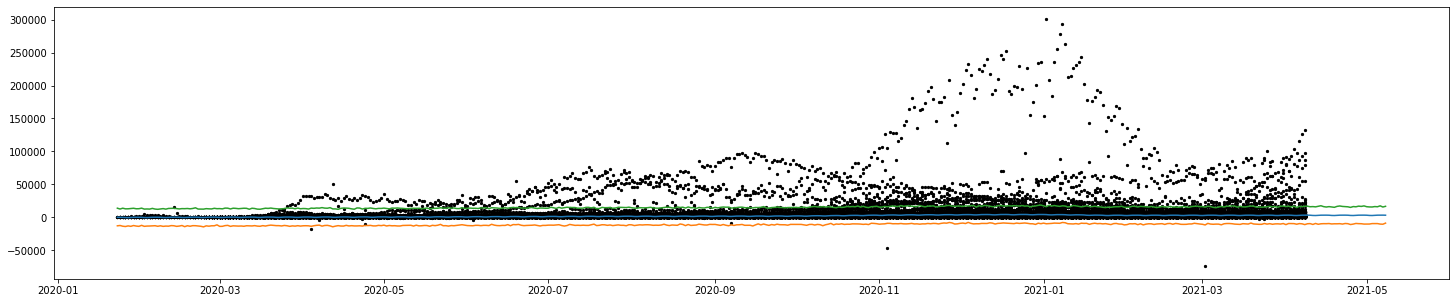

In [ ]:
plt.figure(figsize=(25,5))
plt.scatter(finaldf['ds'],finaldf['y'],s=5,c='k')
plt.plot(forecast['ds'],forecast['yhat'])
plt.plot(forecast['ds'],forecast['yhat_lower'])
plt.plot(forecast['ds'],forecast['yhat_upper'])
plt.show()

In [ ]:
#Making value of cases in AP

df_country = df.groupby(['location']).agg({"new_cases": "sum","new_deaths":"sum"})


QUESTION NEEDE TO BE ANSWERED


i) Which country/state is having highest number of cases?

In [ ]:
column = new_df['total_cases']
max_index = column.idxmax()
df.loc[max_index]

location        United States
continent       North America
date               2021-04-08
total_cases       3.10023e+07
new_cases               79878
total_deaths           560116
new_deaths               1000
Name: 76578, dtype: object

In [ ]:
df_country.sort_values(by='new_cases').tail(3)

,new_cases,new_deaths
location,,
India,13060542.0,167642.0
Brazil,13279857.0,345025.0
United States,31002263.0,560116.0


ii) Which country/state is having lowest number of cases?

In [ ]:
column = new_df['total_cases']
min_index = column.idxmin()
df.loc[min_index]

location        Cayman Islands
continent        North America
date                2021-04-08
total_cases                NaN
new_cases                  NaN
total_deaths               NaN
new_deaths                 NaN
Name: 14019, dtype: object

In [ ]:
df_country.sort_values(by='new_cases').head(16)

,new_cases,new_deaths
location,,
Jersey,0.0,0.0
Bermuda,0.0,0.0
Saint Helena,0.0,0.0
Northern Cyprus,0.0,0.0
Faeroe Islands,0.0,0.0
Falkland Islands,0.0,0.0
Montserrat,0.0,0.0
Turks and Caicos Islands,0.0,0.0
Greenland,0.0,0.0


iii) Which country/state is having lowest number of deaths?


In [ ]:
column = new_df['total_deaths']
min_death = column.idxmin()
df.loc[min_death]

location        Cayman Islands
continent        North America
date                2021-04-08
total_cases                NaN
new_cases                  NaN
total_deaths               NaN
new_deaths                 NaN
Name: 14019, dtype: object

iv) Which country/state is having highest number of deaths?

In [ ]:
column = new_df['total_deaths']
max_death = column.idxmax()
df.loc[max_death]

location        United States
continent       North America
date               2021-04-08
total_cases       3.10023e+07
new_cases               79878
total_deaths           560116
new_deaths               1000
Name: 76578, dtype: object

In [ ]:
df_country.sort_values(by='new_deaths').tail(1)

,new_cases,new_deaths
location,,
United States,31002263.0,560116.0
